## Data aggregation

Goal: create 1 dataset with relevant synthesis parameters and measurement outcomes for everything I've made

Columns in output: UUID, volume fractions of everything, fit results processed with Null if version wasn't best

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../../visualizations/phase_diagram_viz')
import utils as pd_utils

## Load synthesis files

In [3]:
synthesis_files = ['/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_13_RandomSample/SampleTable_RandomSobol_2025_01_13.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_28_80nm_round1/Sample_table_2025_01_28_80nm_Round1_apdist.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_28_80nm_round1/Sample_table_2025_01_28_80nmRound1_rmse.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/80nmTarget_round2/Sample_table_2025_01_30_80nm_Round2_apdist.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/80nmTarget_round2/Sample_table_2025_01_30_80nmbatch2_rmse.csv'
                  ] 

In [4]:
fp2name = {'/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_13_RandomSample/SampleTable_RandomSobol_2025_01_13.csv':'Round2Random',
           '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_28_80nm_round1/Sample_table_2025_01_28_80nm_Round1_apdist.csv':'Opt1_Apdist',
           '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_28_80nm_round1/Sample_table_2025_01_28_80nmRound1_rmse.csv':'Opt1_rmse',
           '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/80nmTarget_round2/Sample_table_2025_01_30_80nm_Round2_apdist.csv':'Opt2_Apdist',
           '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/80nmTarget_round2/Sample_table_2025_01_30_80nmbatch2_rmse.csv':'Opt2_rmse'
          }


In [6]:
with open('../2025_01_13_RandomSample/constants_Round2_2025_01_13.json', 'rt') as f:
    constants = json.load(f)

## split apdist and rmse uuids

In [8]:
random_files = ['Round2Random']
apdist_files = ['Opt1_Apdist', 'Opt2_Apdist']
rmse_files = ['Opt1_rmse', 'Opt2_rmse']

In [9]:
synth_tables = []

random_uuids = []
apdist_uuids = []
rmse_uuids = []

count = 0
for fp in synthesis_files:
    data= pd.read_csv(fp)
    name = fp2name[fp]
    data['campaign'] = [name]*len(data)
    synth_tables.append(data)
    count += len(data)
    if name in random_files:
        random_uuids.extend(list(data['uuid']))
    if name in apdist_files:
        apdist_uuids.extend(list(data['uuid']))
    if name in rmse_files:
        rmse_uuids.extend(list(data['uuid']))
        
    

synth_table = pd.concat(synth_tables, axis = 0)

In [10]:
len(random_uuids)

32

In [11]:
synth_table

,Unnamed: 0,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well
0,0,c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,NaN,NaN
1,1,3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,NaN,NaN
2,2,0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,NaN,NaN
3,3,82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,NaN,NaN
4,4,9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,a01ce3b0-5fd4-4078-8821-881fd5338ce8,400.367840,391.086414,726.750029,181.795717,0.270120,22.241975,0.026431,C2,Opt2_rmse,1241.0,459.0,E8
6,6,48da5aa2-9f93-4512-843c-098b23a1880b,484.500007,184.061262,24.224999,1007.213732,0.223214,26.915840,0.033273,C3,Opt2_rmse,1321.0,379.0,F1
7,7,331fe194-adb0-47d4-a81b-e16511d87d9b,484.500007,66.244823,726.750029,422.505141,0.223214,26.915840,0.032174,C4,Opt2_rmse,1321.0,379.0,F2
8,8,2cf0de63-e0fd-4c8c-ae3a-073ff1f6e3d2,312.735605,116.733826,726.750029,543.780540,0.345811,17.373667,0.020866,C5,Opt2_rmse,1112.0,588.0,F3


In [12]:
synth_table = synth_table.drop(['Unnamed: 0'], axis = 1)


In [13]:
synth_table = synth_table.set_index('uuid')

In [14]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well
uuid,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,NaN,NaN
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,NaN,NaN
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,NaN,NaN
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,NaN,NaN
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
a01ce3b0-5fd4-4078-8821-881fd5338ce8,400.367840,391.086414,726.750029,181.795717,0.270120,22.241975,0.026431,C2,Opt2_rmse,1241.0,459.0,E8
48da5aa2-9f93-4512-843c-098b23a1880b,484.500007,184.061262,24.224999,1007.213732,0.223214,26.915840,0.033273,C3,Opt2_rmse,1321.0,379.0,F1
331fe194-adb0-47d4-a81b-e16511d87d9b,484.500007,66.244823,726.750029,422.505141,0.223214,26.915840,0.032174,C4,Opt2_rmse,1321.0,379.0,F2


## Get volume fractions

In [15]:
def target_vol(row):
    target_vol = row['teos_volume'] + row['ammonia_volume'] + row['water_volume'] + row['ethanol_volume']
    return target_vol
    

In [16]:
synth_table['target_volume'] = synth_table.apply(target_vol, axis=1)

In [17]:
constants['TEOS']['dilution_ratio']

2.85

In [18]:
# Divide by dilution ratio to get component volume fraction from volume of dilute solution added
synth_table['teos_vol_frac'] = synth_table['teos_volume']/synth_table['target_volume']/constants['TEOS']['dilution_ratio']
synth_table['ammonia_vol_frac'] = synth_table['ammonia_volume']/synth_table['target_volume']/constants['ammonia']['dilution_ratio']
synth_table['water_vol_frac'] = synth_table['water_volume']/synth_table['target_volume']/constants['water']['dilution_ratio']
synth_table['ethanol_vol_frac'] = synth_table['ethanol_volume']/synth_table['target_volume']

In [20]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac
uuid,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,NaN,NaN,1700.0,0.045948,0.082365,0.121930,0.286809
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,NaN,NaN,1700.0,0.087632,0.046562,0.077317,0.397194
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,NaN,NaN,1700.0,0.059902,0.053465,0.110338,0.362440
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,NaN,NaN,1700.0,0.018002,0.027678,0.009615,0.842409
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,NaN,NaN,1700.0,0.009122,0.072923,0.056646,0.604731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a01ce3b0-5fd4-4078-8821-881fd5338ce8,400.367840,391.086414,726.750029,181.795717,0.270120,22.241975,0.026431,C2,Opt2_rmse,1241.0,459.0,E8,1700.0,0.082635,0.080720,0.150000,0.106939
48da5aa2-9f93-4512-843c-098b23a1880b,484.500007,184.061262,24.224999,1007.213732,0.223214,26.915840,0.033273,C3,Opt2_rmse,1321.0,379.0,F1,1700.0,0.100000,0.037990,0.005000,0.592479
331fe194-adb0-47d4-a81b-e16511d87d9b,484.500007,66.244823,726.750029,422.505141,0.223214,26.915840,0.032174,C4,Opt2_rmse,1321.0,379.0,F2,1700.0,0.100000,0.013673,0.150000,0.248532


In [21]:
#synth_table.to_csv('synth_table_master_11_11_24.csv')

## Load distance file

In [23]:
distance_results = pd.read_csv('distance_results_Round2_80nmOpt2_80nm.csv')

In [24]:
distance_results = distance_results.set_index('uuid')

In [25]:
distance_results

,Unnamed: 0,amplitude_distance,phase_distance,sum_ap_distance,raw_rmse_distance,sphere_diameter_nm,sphere_pdi,processes_status
uuid,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,0,0.994091,0.528099,1.522190,0.255116,75.943310,1.000000,success
3ef8b92f-f2eb-4134-ad6c-ae3329408457,1,1.033666,0.514583,1.548249,0.264217,101.152856,0.730457,success
0507cf19-673b-4d6b-922e-c21f718ad4fe,2,0.930899,0.558692,1.489590,0.254219,74.915296,1.000000,success
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,3,0.734126,0.257073,0.991199,0.298204,63.510045,0.136633,success
9964ab9f-5b01-4ae2-b492-a1be55ce083f,4,0.889431,0.539605,1.429035,0.302280,177.793802,0.150685,success
...,...,...,...,...,...,...,...,...
a01ce3b0-5fd4-4078-8821-881fd5338ce8,67,0.864257,0.567573,1.431830,0.272257,91.109036,0.701082,success
48da5aa2-9f93-4512-843c-098b23a1880b,68,1.003321,0.453524,1.456844,0.213977,65.907290,0.562205,success
331fe194-adb0-47d4-a81b-e16511d87d9b,69,0.920167,0.508162,1.428329,0.262123,99.134316,0.733201,success


In [26]:
distance_list = []
rmse_list = []
experiment_status = []

for uuid_val in synth_table.index:
    print(uuid_val)
    try:
        row = distance_results.loc[uuid_val]
    except KeyError:
        distance_list.append(None)
        rmse_list.append(None)
        experiment_status.append('incomplete')
        continue

    if row['processes_status'] == 'failed':
        distance_list.append(distance_results['sum_ap_distance'].max())
        rmse_list.append(distance_results['raw_rmse_distance'].max())
        experiment_status.append('complete')
    if row['processes_status'] == 'success':
        distance_list.append(row['sum_ap_distance'])
        rmse_list.append(row['raw_rmse_distance'])
        experiment_status.append('complete')
        


c563cb4d-d727-437f-9a6a-fef3eccbbe50
3ef8b92f-f2eb-4134-ad6c-ae3329408457
0507cf19-673b-4d6b-922e-c21f718ad4fe
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7
9964ab9f-5b01-4ae2-b492-a1be55ce083f
d263a9a8-70c2-49a4-badb-03a72fa16632
586ae478-4dab-4d7d-9382-ab359a49387a
7386215f-7150-48a6-b35f-96cbe5b743cf
d408858a-bbae-4227-8e64-6c368a1f3398
0c042bd5-e5ed-4460-9bb9-d8556dba293c
8fbd8649-0d61-4edc-9fe3-1ca354becc5a
d4ebf798-d856-406f-9732-f11da412170b
e44ddf37-b7d0-420b-bf6c-02535ca6803a
238ebc43-fbc1-4049-b506-1dc041dedb42
8aacf82b-9869-48dd-ad8a-85eaca6ce824
a635324c-8eea-4566-af05-e39d8101ef91
08f1d123-975c-4dca-b962-6134f27e4ddc
d91aa15e-1296-4485-94d0-0cf924b116de
1537344f-106d-4cb9-b1de-3262334f8665
7c2bc3ea-ff76-42ba-88f9-86fb14a0f437
1ec7142f-1f4f-44ee-965b-da3a052e0b2a
13735048-3ac7-447e-8bca-7af4fda689cb
f041b533-6c1d-4be3-aa7b-01521b804bf8
1c5c16fb-5f52-451d-a370-36a6418ab246
0a4b4bec-376d-4106-853e-53c50b36e515
ee885bbe-4e05-426d-9772-0e1e3293e727
da675871-7139-4a31-8e76-317fb87385fa
9

In [27]:
synth_table['ap_distance'] = distance_list
synth_table['rmse_distance'] = rmse_list
synth_table['experiment_status'] = experiment_status

In [28]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,NaN,NaN,1700.0,0.045948,0.082365,0.121930,0.286809,1.522190,0.255116,complete
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,NaN,NaN,1700.0,0.087632,0.046562,0.077317,0.397194,1.548249,0.264217,complete
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,NaN,NaN,1700.0,0.059902,0.053465,0.110338,0.362440,1.489590,0.254219,complete
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,NaN,NaN,1700.0,0.018002,0.027678,0.009615,0.842409,0.991199,0.298204,complete
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,NaN,NaN,1700.0,0.009122,0.072923,0.056646,0.604731,1.429035,0.302280,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a01ce3b0-5fd4-4078-8821-881fd5338ce8,400.367840,391.086414,726.750029,181.795717,0.270120,22.241975,0.026431,C2,Opt2_rmse,1241.0,459.0,E8,1700.0,0.082635,0.080720,0.150000,0.106939,1.431830,0.272257,complete
48da5aa2-9f93-4512-843c-098b23a1880b,484.500007,184.061262,24.224999,1007.213732,0.223214,26.915840,0.033273,C3,Opt2_rmse,1321.0,379.0,F1,1700.0,0.100000,0.037990,0.005000,0.592479,1.456844,0.213977,complete
331fe194-adb0-47d4-a81b-e16511d87d9b,484.500007,66.244823,726.750029,422.505141,0.223214,26.915840,0.032174,C4,Opt2_rmse,1321.0,379.0,F2,1700.0,0.100000,0.013673,0.150000,0.248532,1.428329,0.262123,complete


## Split out RMSE and APDist results

In [29]:
apdist_samples = random_uuids.copy()
apdist_samples.extend(apdist_uuids)

rmse_samples = random_uuids.copy()
rmse_samples.extend(rmse_uuids)

In [30]:
len(rmse_samples)

52

In [31]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,NaN,NaN,1700.0,0.045948,0.082365,0.121930,0.286809,1.522190,0.255116,complete
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,NaN,NaN,1700.0,0.087632,0.046562,0.077317,0.397194,1.548249,0.264217,complete
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,NaN,NaN,1700.0,0.059902,0.053465,0.110338,0.362440,1.489590,0.254219,complete
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,NaN,NaN,1700.0,0.018002,0.027678,0.009615,0.842409,0.991199,0.298204,complete
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,NaN,NaN,1700.0,0.009122,0.072923,0.056646,0.604731,1.429035,0.302280,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a01ce3b0-5fd4-4078-8821-881fd5338ce8,400.367840,391.086414,726.750029,181.795717,0.270120,22.241975,0.026431,C2,Opt2_rmse,1241.0,459.0,E8,1700.0,0.082635,0.080720,0.150000,0.106939,1.431830,0.272257,complete
48da5aa2-9f93-4512-843c-098b23a1880b,484.500007,184.061262,24.224999,1007.213732,0.223214,26.915840,0.033273,C3,Opt2_rmse,1321.0,379.0,F1,1700.0,0.100000,0.037990,0.005000,0.592479,1.456844,0.213977,complete
331fe194-adb0-47d4-a81b-e16511d87d9b,484.500007,66.244823,726.750029,422.505141,0.223214,26.915840,0.032174,C4,Opt2_rmse,1321.0,379.0,F2,1700.0,0.100000,0.013673,0.150000,0.248532,1.428329,0.262123,complete


In [32]:
rmse_samples

['c563cb4d-d727-437f-9a6a-fef3eccbbe50',
 '3ef8b92f-f2eb-4134-ad6c-ae3329408457',
 '0507cf19-673b-4d6b-922e-c21f718ad4fe',
 '82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7',
 '9964ab9f-5b01-4ae2-b492-a1be55ce083f',
 'd263a9a8-70c2-49a4-badb-03a72fa16632',
 '586ae478-4dab-4d7d-9382-ab359a49387a',
 '7386215f-7150-48a6-b35f-96cbe5b743cf',
 'd408858a-bbae-4227-8e64-6c368a1f3398',
 '0c042bd5-e5ed-4460-9bb9-d8556dba293c',
 '8fbd8649-0d61-4edc-9fe3-1ca354becc5a',
 'd4ebf798-d856-406f-9732-f11da412170b',
 'e44ddf37-b7d0-420b-bf6c-02535ca6803a',
 '238ebc43-fbc1-4049-b506-1dc041dedb42',
 '8aacf82b-9869-48dd-ad8a-85eaca6ce824',
 'a635324c-8eea-4566-af05-e39d8101ef91',
 '08f1d123-975c-4dca-b962-6134f27e4ddc',
 'd91aa15e-1296-4485-94d0-0cf924b116de',
 '1537344f-106d-4cb9-b1de-3262334f8665',
 '7c2bc3ea-ff76-42ba-88f9-86fb14a0f437',
 '1ec7142f-1f4f-44ee-965b-da3a052e0b2a',
 '13735048-3ac7-447e-8bca-7af4fda689cb',
 'f041b533-6c1d-4be3-aa7b-01521b804bf8',
 '1c5c16fb-5f52-451d-a370-36a6418ab246',
 '0a4b4bec-376d-

In [33]:
synth_table_apdist = synth_table.loc[apdist_samples]
synth_table_rmse = synth_table.loc[rmse_samples]

In [34]:
synth_table_apdist = synth_table_apdist[synth_table_apdist['experiment_status'] == 'complete'].copy()
synth_table_rmse = synth_table_rmse[synth_table_rmse['experiment_status'] == 'complete'].copy()

In [35]:
synth_table_apdist['rank'] = synth_table_apdist['ap_distance'].rank()
synth_table_rmse['rank'] = synth_table_rmse['ap_distance'].rank()

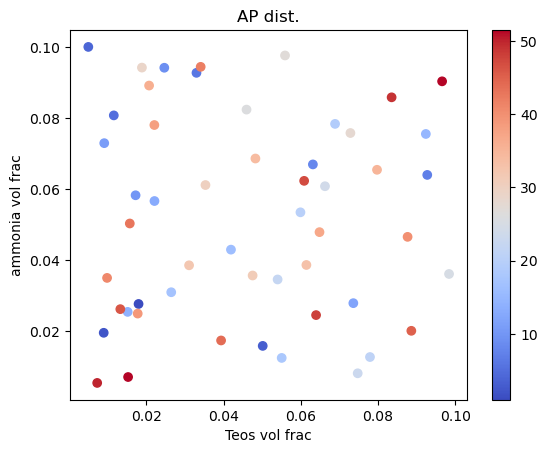

In [36]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_apdist['teos_vol_frac'], synth_table_apdist['ammonia_vol_frac'], c = synth_table_apdist['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('AP dist.')
cbar = fig.colorbar(sc, ax = ax)

In [37]:
synth_table['teos_vol_frac'].max()

0.1000000014901161

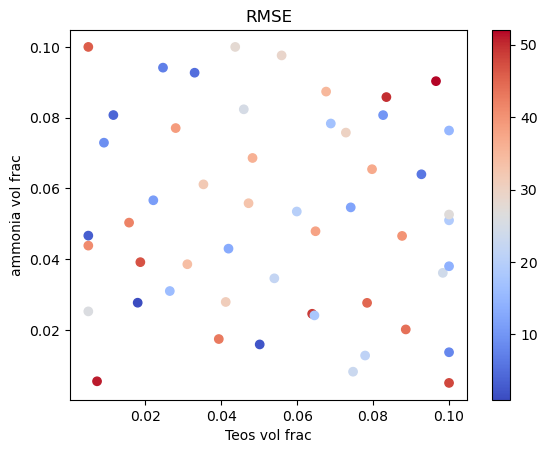

In [38]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_rmse['teos_vol_frac'], synth_table_rmse['ammonia_vol_frac'], c = synth_table_rmse['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('RMSE')
cbar = fig.colorbar(sc, ax = ax)

In [39]:

name_bounds_apdist = {}
for name in fp2name.values():
    name_bounds_apdist[name] = []
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_apdist[name].append(count)
        count += 1
        

In [40]:
best_distances_ap = []
for i, row in synth_table_apdist.iterrows():
    dist = row['ap_distance']
    if len(best_distances_ap) == 0:
        best_distances_ap.append(dist)
    else:
        best_distances_ap.append(min(best_distances_ap[-1], dist))

/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


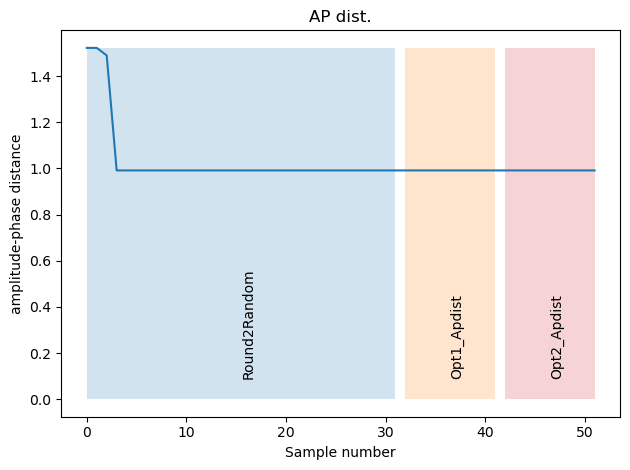

In [41]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_apdist.items():
    ax.fill_between(bounds, 0, max(best_distances_ap), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances_ap)


ax.set_xlabel('Sample number')
ax.set_ylabel('amplitude-phase distance')
ax.set_title('AP dist.')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [42]:
# rmse
name_bounds_rmse = {}
for name in fp2name.values():
    name_bounds_rmse[name] = []
    count = 0
    for i, row in synth_table_rmse.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_rmse[name].append(count)
        count += 1

In [43]:
best_distances_rmse = []
for i, row in synth_table_rmse.iterrows():
    dist = row['ap_distance']
    if len(best_distances_rmse) == 0:
        best_distances_rmse.append(dist)
    else:
        best_distances_rmse.append(min(best_distances_rmse[-1], dist))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


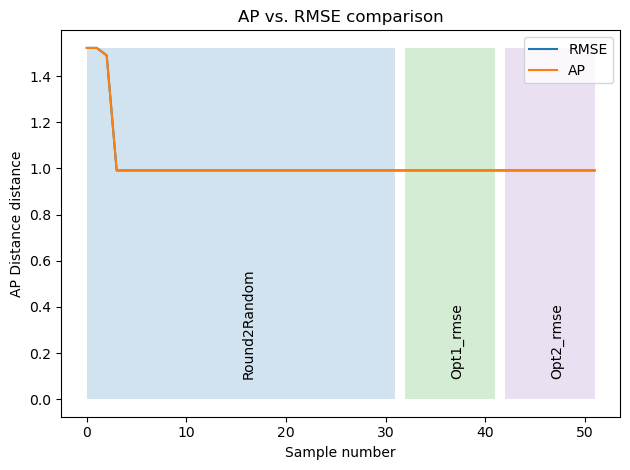

In [44]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_rmse.items():
    ax.fill_between(bounds, 0, max(best_distances_rmse), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances_rmse, label = 'RMSE')
ax.plot(best_distances_ap, label = 'AP')

ax.legend(loc = 'upper right')


ax.set_xlabel('Sample number')
ax.set_ylabel('AP Distance distance')
ax.set_title('AP vs. RMSE comparison')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [45]:
synth_table_rmse[synth_table_rmse['rmse_distance'] == synth_table_rmse['rmse_distance'].min()]

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,...,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,,,,,
48da5aa2-9f93-4512-843c-098b23a1880b,484.500007,184.061262,24.224999,1007.213732,0.223214,26.91584,0.033273,C3,Opt2_rmse,1321.0,...,F1,1700.0,0.1,0.03799,0.005,0.592479,1.456844,0.213977,complete,14.0


In [46]:
synth_table_rmse

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,...,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,...,NaN,1700.0,0.045948,0.082365,0.121930,0.286809,1.522190,0.255116,complete,25.0
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,...,NaN,1700.0,0.087632,0.046562,0.077317,0.397194,1.548249,0.264217,complete,40.0
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,...,NaN,1700.0,0.059902,0.053465,0.110338,0.362440,1.489590,0.254219,complete,20.0
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,...,NaN,1700.0,0.018002,0.027678,0.009615,0.842409,0.991199,0.298204,complete,1.0
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,...,NaN,1700.0,0.009122,0.072923,0.056646,0.604731,1.429035,0.302280,complete,9.0
d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random,NaN,...,NaN,1700.0,0.074719,0.008173,0.138075,0.370242,1.506382,0.314632,complete,23.0
586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random,NaN,...,NaN,1700.0,0.096565,0.090322,0.030291,0.381045,2.237381,1.856282,complete,52.0
7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random,NaN,...,NaN,1700.0,0.031078,0.038559,0.094197,0.533074,1.536987,0.259520,complete,34.0
d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random,NaN,...,NaN,1700.0,0.035319,0.061139,0.032709,0.631871,1.533968,0.256223,complete,32.0


In [47]:
## best for campaign plot

name_distances_apdist = {}
for name in fp2name.values():
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            try:
               name_distances_apdist[name].append(row['ap_distance'])
            except KeyError:
                name_distances_apdist[name] = [row['ap_distance']]
        count += 1

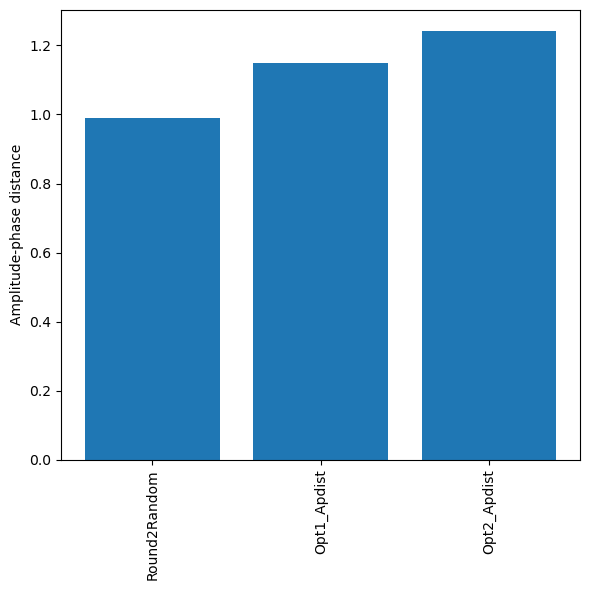

In [48]:
fig, ax = plt.subplots(figsize = (6,6))
name_distances_max = [min(distances) for distances in name_distances_apdist.values()]
ax.bar(name_distances_apdist.keys(), name_distances_max)
ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Amplitude-phase distance')

plt.tight_layout()

plt.savefig('best_per_campaign.png', dpi = 300)

In [55]:
synth_table_apdist.to_csv('synth_table_Round2_opt2_80nm.csv')
#synth_table_rmse.to_csv('synth_table_12_18_24_rmse.csv')

## Phase diagram plot

In [53]:
with open('scaled_intensities_Opt2_Batch2.json', 'r') as f:
    intensities = json.load(f)

with open('../2025_01_28_80nm_round1/constants_Round2_2025_01_28.json', 'r') as f:
    constants = json.load(f)

In [56]:
sample_table = pd.read_csv('synth_table_Round2_opt2_80nm.csv')

In [57]:
x_name = 'TEOS'
y_name = 'water'
y_2_name = 'ammonia'

x_min = constants[x_name]['minimum_volume_fraction']
x_max = constants[x_name]['maximum_volume_fraction']
y_min = constants[y_name]['minimum_volume_fraction']
y_max = constants[y_name]['maximum_volume_fraction']

y_2_min = constants[y_2_name]['minimum_volume_fraction']
y_2_max = constants[y_2_name]['maximum_volume_fraction']

bounds = np.array([[x_min, y_min], [x_max, y_max]])
bounds_2 = np.array([[x_min, y_2_min], [x_max, y_2_max]])

### APdist

I scaled None
<function plot_phasemap.<locals>.<lambda> at 0x7fc389799940>
<function plot_phasemap.<locals>.<lambda> at 0x7fc388bb5940>


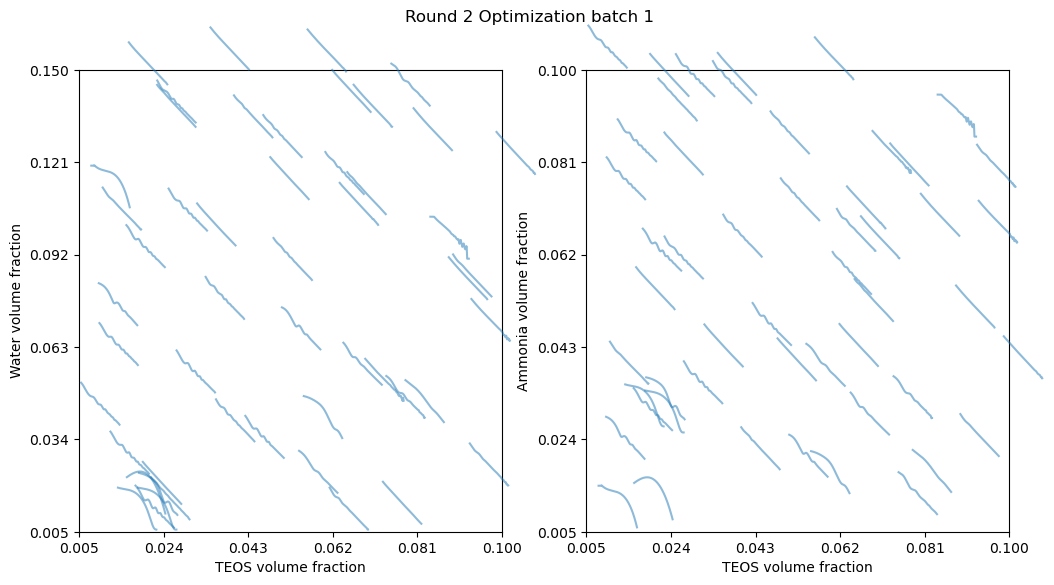

In [58]:
x_key = 'teos_vol_frac'
y_key = 'water_vol_frac'
y_2_key = 'ammonia_vol_frac'

fig, ax = plt.subplots(1,2, figsize = (12,6))

c_1 = []
s = []
c_2 = []
for uuid_val in apdist_samples:
    row = synth_table.loc[uuid_val]


    x_val = row[x_key]
    y_val = row[y_key]
    y_2_val = row[y_2_key]
    
    intensity = intensities[uuid_val]
    

    q = intensity['q_grid']
    I = intensity['I_scaled']

    if I == None:
        print('I scaled None')
        continue

    else:
        c_1.append([x_val, y_val])
        s.append(I)
        c_2.append([x_val, y_2_val])

s = np.array(s)

pd_utils.plot_phasemap(bounds, ax[0], c_1, s, scale_axis=True)
pd_utils.plot_phasemap(bounds_2, ax[1], c_2, s)


ax[0].set_xlabel('TEOS volume fraction')
ax[0].set_ylabel('Water volume fraction')
ax[1].set_xlabel('TEOS volume fraction')
ax[1].set_ylabel('Ammonia volume fraction')


fig.suptitle('Round 2 Optimization batch 1')
plt.savefig('Phaseplot_Round2Random.png', dpi = 300)

## RMSE

I scaled None
<function plot_phasemap.<locals>.<lambda> at 0x7fc3825f0220>
<function plot_phasemap.<locals>.<lambda> at 0x7fc3884f5580>


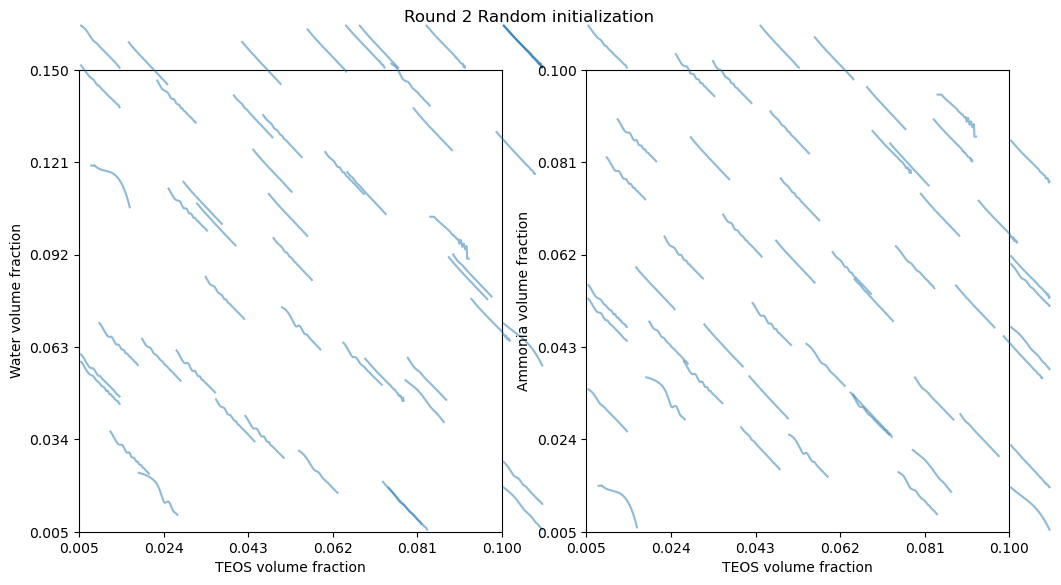

In [59]:
x_key = 'teos_vol_frac'
y_key = 'water_vol_frac'
y_2_key = 'ammonia_vol_frac'

fig, ax = plt.subplots(1,2, figsize = (12,6))

c_1 = []
s = []
c_2 = []
for uuid_val in rmse_samples:
    row = synth_table.loc[uuid_val]


    x_val = row[x_key]
    y_val = row[y_key]
    y_2_val = row[y_2_key]
    
    intensity = intensities[uuid_val]
    

    q = intensity['q_grid']
    I = intensity['I_scaled']

    if I == None:
        print('I scaled None')
        continue

    else:
        c_1.append([x_val, y_val])
        s.append(I)
        c_2.append([x_val, y_2_val])

s = np.array(s)

pd_utils.plot_phasemap(bounds, ax[0], c_1, s, scale_axis=True)
pd_utils.plot_phasemap(bounds_2, ax[1], c_2, s)


ax[0].set_xlabel('TEOS volume fraction')
ax[0].set_ylabel('Water volume fraction')
ax[1].set_xlabel('TEOS volume fraction')
ax[1].set_ylabel('Ammonia volume fraction')


fig.suptitle('Round 2 Random initialization')
plt.savefig('Phaseplot_Round2Random.png', dpi = 300)